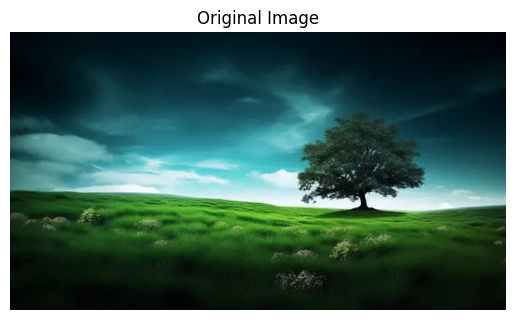

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


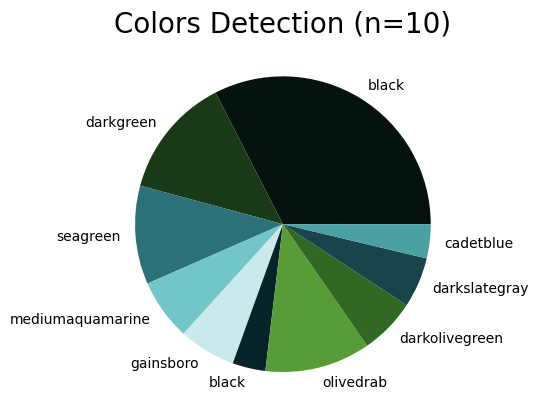

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from collections import Counter
import cv2
import webcolors



#def hex_to_rgb(hex):
  #0,1,2 represent red,green,blue
    #return tuple(int(hex[i:i+2], 16) for i in (1, 3, 5))

def get_color_name(rgb):
  #to store squared euclidiean distance create empty dict
    min_colors = {}
    # key is a hexadecimal color code and  value is the corresponding CSS3 color name.
    for key, name in webcolors.CSS3_HEX_TO_NAMES.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        #squared Euclidean distance between the input RGB color (rgb) and the RGB representation of each predefined CSS3 color.
        rd = (r_c - rgb[0]) ** 2
        gd = (g_c - rgb[1]) ** 2
        bd = (b_c - rgb[2]) ** 2
        # Stores squared Euclidean distance (rd + gd + bd) as  key and corresponding CSS3 color name as value incthe min_colors dictionary,
        min_colors[(rd + gd + bd)] = name
    return min_colors[min(min_colors.keys())]

def get_image(image_path):
    #loads an image from a file as a NumPy array.
    image = cv2.imread(image_path)
    #convert to rgb format
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

# Set a random seed for reproducibility
np.random.seed(42)

image = get_image('/content/send2.jpg')
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')
plt.show()

number_of_colors = 10
                                #width*column=pixels,rgb
modified_image = image.reshape(image.shape[0]*image.shape[1], 3)
#stores cluster labels and their count
clf = KMeans(n_clusters=number_of_colors, random_state=42)
#fits model to data and returns labels
labels = clf.fit_predict(modified_image)
counts = Counter(labels)

center_colors = clf.cluster_centers_
#sorted acc to most frequent colour
ordered_colors = [center_colors[i] for i in counts.keys()]
hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
rgb_colors = [ordered_colors[i] for i in counts.keys()]
#retrive rgb colour and get colour name
color_names = [get_color_name(rgb) for rgb in rgb_colors]

plt.title('Colors Detection (n=10)', fontsize=20)
plt.pie(counts.values(), labels = color_names, colors = hex_colors)
plt.show()


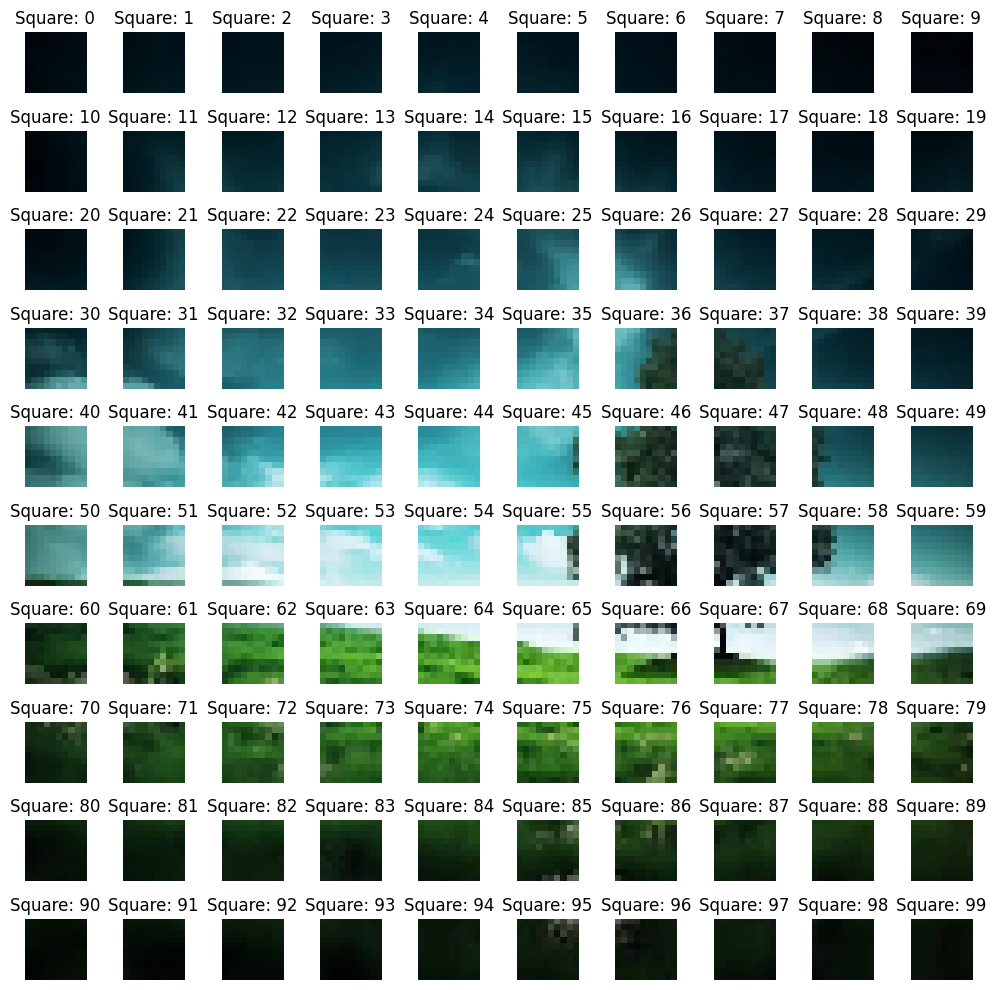

In [ ]:


def square_maker(image):
    h, w, _ = image.shape
    step_h = h // 10
    step_w = w // 10
    squares = []                      #Suares stored in numpy array
    for i in range(10):
        for j in range(10):
            square = image[i*step_h:(i+1)*step_h, j*step_w:(j+1)*step_w]
            # Resize square to a fixed size (e.g., 10x10)
            square_resized = cv2.resize(square, (10, 10))
            squares.append(square_resized)
    return np.array(squares)


# calculates the color differences between each square in an image and a list of RGB colors.

def color_computing(image, rgb_colors):
    DIFF = []
    squared_image = square_maker(image)

  # Iterate over each square in the squared image
    for square in squared_image:
        DIFF_COLOR = []  # Initialize an empty list to store color differences for each square

        # Iterate over each RGB color in the provided list of RGB colors
        for color in range(len(rgb_colors)):
            diff = np.abs(square - rgb_colors[color])            # Calculate the absolute difference
            DIFF_COLOR.append(diff.mean())                  # Calculate the mean difference
        DIFF.append(DIFF_COLOR)
    return np.array(DIFF)


def best_color_plot(image):                #visualize squares generated
    num_squares = 100
    num_cols = 10  # Number of columns
    num_rows = (num_squares + num_cols - 1) // num_cols  # Calculate number of rows for subplots
    plt.figure(figsize=(10, 10))  # Adjust figsize based on number of squares

    squares = square_maker(image)
    for i in range(num_squares):
        plt.subplot(num_rows, num_cols, i+1, aspect='equal')  # Set aspect ratio to 'equal'
        plt.title('Square: ' + str(i))
        plt.imshow(squares[i])
        plt.axis('off')

    plt.tight_layout()  # Adjust subplot parameters to give specified padding
    plt.show()

# Example usage:
image = get_image('/content/send2.jpg')
best_color_plot(image)



In [ ]:
def square_maker(image):
    h = image.shape[0]
    step_h = h // 10
    w = image.shape[1]
    step_w = w // 10
    X = np.arange(0, h + step_h, step_h)
    Y = np.arange(0, w + step_w, step_w)
    squares = []
    for i in range(len(X) - 1):
        for j in range(len(Y) - 1):
            square = image[X[i]:X[i + 1], Y[j]:Y[j + 1]]
            square_resized = cv2.resize(square, (16, 16))
            squares.append(square_resized)
    return np.array(squares)

def color_computing(image, rgb_colors):
    DIFF = []
    squared_image = square_maker(image)
    for square in squared_image:
        DIFF_COLOR = []
        for color in rgb_colors:
            diff = np.abs(square - color)
            DIFF_COLOR.append(diff.mean())
        DIFF.append(DIFF_COLOR)
    return np.array(DIFF)


def build_summary(image, rgb_colors):                          #table of color differences for each square
    results = color_computing(image, rgb_colors)
    cols = ['Square Number'] + color_names
    summary_data = []

    # Iterate over the first 100 squares
    for k in range(100):
        d = {'Square Number': k}
        for c in range(len(color_names)):
            #calculate percentage of each color to total difference of square
            d[color_names[c]] = results[k][c] * 100 / sum(results[k])
        summary_data.append(d)

    return pd.DataFrame(summary_data, columns=cols)

summary_df = build_summary(image, rgb_colors)

print(summary_df)
summary_df.head()

    Square Number     black  darkgreen   seagreen  mediumaquamarine  \
0               0  2.316030   3.247170  10.088097         19.573983   
1               1  1.742242   2.870506  10.004704         20.089123   
2               2  1.557969   2.881970   9.954654         20.202893   
3               3  1.211918   2.962776   9.831347         20.360672   
4               4  0.904812   3.023669   9.673878         20.510855   
..            ...       ...        ...        ...               ...   
95             95  2.336062   2.565650   9.638779         20.181461   
96             96  2.207663   2.737342   9.894304         20.076711   
97             97  2.053121   2.700229   9.988343         20.093736   
98             98  2.308408   3.151232  10.084546         19.697986   
99             99  2.327498   3.163387  10.082527         19.676315   

    gainsboro     black  olivedrab  darkolivegreen  darkslategray  cadetblue  
0   25.893244  2.316030  11.029584        6.496881       5.680134  1

,Square Number,black,darkgreen,seagreen,mediumaquamarine,gainsboro,black,olivedrab,darkolivegreen,darkslategray,cadetblue
0,0,2.316030,3.247170,10.088097,19.573983,25.893244,2.316030,11.029584,6.496881,5.680134,14.989276
1,1,1.742242,2.870506,10.004704,20.089123,26.807112,1.742242,11.005597,6.186892,5.318611,15.215134
2,2,1.557969,2.881970,9.954654,20.202893,27.030015,1.557969,10.971806,6.075564,5.192436,15.249726
3,3,1.211918,2.962776,9.831347,20.360672,27.375047,1.211918,10.876397,5.923767,4.938513,15.271651
4,4,0.904812,3.023669,9.673878,20.510855,27.730178,0.904812,10.749463,5.862000,4.638082,15.273140


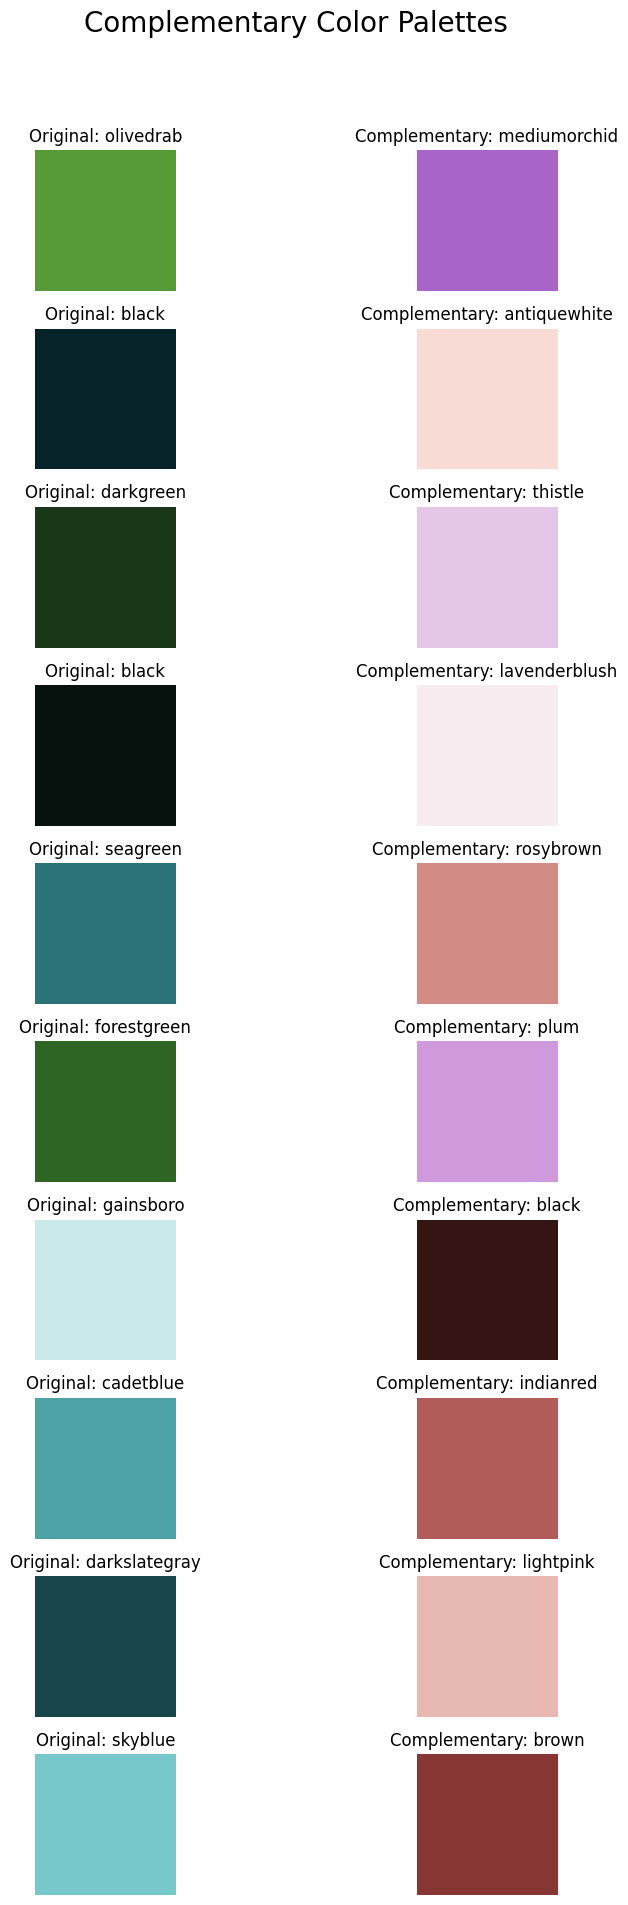

In [ ]:
def find_complementary_color(rgb):
    return np.array([255 - rgb[0], 255 - rgb[1], 255 - rgb[2]])

# Only generating complementary color palettes
complementary_palettes = [find_complementary_color(rgb) for rgb in rgb_colors]

# Visualize the complementary color palettes
fig, axes = plt.subplots(nrows=number_of_colors, ncols=2, figsize=(10, 2 * number_of_colors))
fig.suptitle('Complementary Color Palettes', fontsize=20)

for i in range(number_of_colors):
    axes[i, 0].imshow([[np.array(rgb_colors[i]) / 255]])
    axes[i, 0].set_title('Original: ' + color_names[i])
    axes[i, 0].axis('off')

    axes[i, 1].imshow([[complementary_palettes[i] / 255]])
    axes[i, 1].set_title('Complementary: ' + get_color_name(complementary_palettes[i]))
    axes[i, 1].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


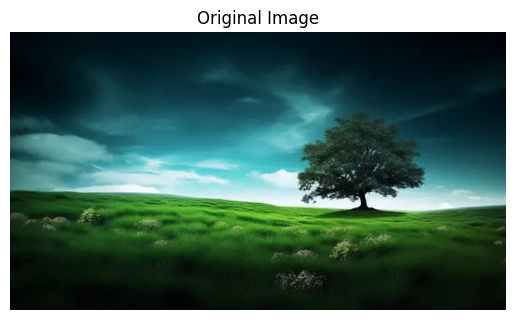

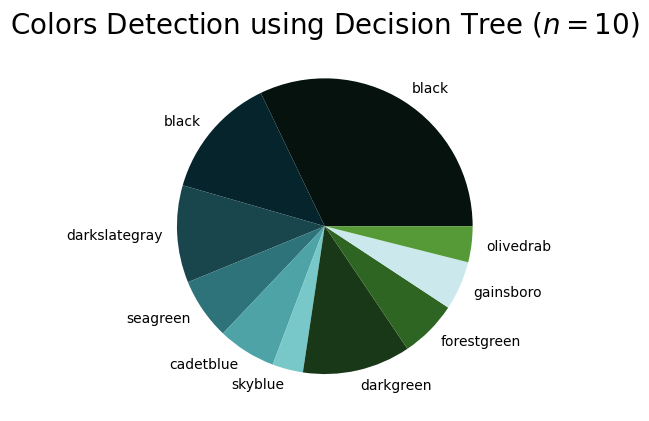

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Prepare data
X = modified_image  # Flattened image pixels - converting 3D array into 1D array
y = labels  # Use the labels obtained from KMeans clustering

# Train decision tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X, y) #this means that the decision tree is getting trained

# Predict cluster labels for each pixel
predicted_labels = decision_tree.predict(X)
#here, X is passed to the trained decision tree and the labels are predicted

# Count the occurrences of each predicted label
predicted_counts = Counter(predicted_labels) #counter from collections module

# Extract the center colors for each predicted label
predicted_colors = [center_colors[label] for label in predicted_counts.keys()] # running a for loop in predicted_counts

# Convert RGB colors to HEX
predicted_hex_colors = [RGB2HEX(color) for color in predicted_colors]

# Convert RGB colors to color names
predicted_color_names = [get_color_name(color) for color in predicted_colors]

#predicted_colors, hex_color and color_names are created lists
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')
plt.show()

# Visualize the results
plt.title('Colors Detection using Decision Tree ($n=10$)', fontsize=20)
plt.pie(predicted_counts.values(), labels=predicted_color_names, colors=predicted_hex_colors)
plt.show()


In [ ]:
#accuracy calculation code
import numpy as np
import cv2 #image processing
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score #for accuracy calculation
from collections import Counter
import webcolors #color recognition

# Function to convert RGB color to HEX
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))
    #str.format() is the function used here - used for string formatting
    # :02x means that the num has to be in hex format and must have two digits. thus written three times
    # color[0] color[1] color[2] = R G B in the rgb space

# Function to get color name from RGB - finds the closest color
def get_color_name(rgb):
    min_colors = {} #min_colors dictionary created
    for key, name in webcolors.CSS3_HEX_TO_NAMES.items():
        #hex_to_names - dict provided by webcolors
        #items() - called on the dictionary, which returns a view object that displays a list of key-value pairs (tuples) from the dictionary.
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        #using hex_to_rgb, we get rgb value and assign its red, green and blue components to r_c g_c and b_c
        rd = (r_c - rgb[0]) ** 2
        gd = (g_c - rgb[1]) ** 2
        bd = (b_c - rgb[2]) ** 2
        #subtracting input rgb values from r_c g_c and b_c which are in current css3 color - similar to dist formula - least dist = closest color
        min_colors[(rd + gd + bd)] = name
    return min_colors[min(min_colors.keys())]

# Function to get image
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # since we are using rgb color space, we are converting from bgr to rgb
    return image

# Load the image
image = get_image('/content/send2.jpg')

# Flatten the image
modified_image = image.reshape(image.shape[0]*image.shape[1], 3)
                                      #rows          #cols
# Use KMeans to generate labels
kmeans = KMeans(n_clusters=10) #specifying num of clusters to 10
kmeans.fit(modified_image) #passing flattened image as parameter
kmeans_labels = kmeans.labels_

# Use Decision Tree to generate labels
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(modified_image, kmeans_labels) #fitting the data to the model
dt_labels = dt_classifier.predict(modified_image) #passing modified img to predict the labels for it
#these labels are the true labels here

# Get true labels (ground truth)
# You need to provide the true labels manually or from ground truth data
# For demonstration purposes, let's assume true_labels is obtained from KMeans clustering itself
true_labels = kmeans_labels

# Calculate accuracy for KMeans
kmeans_accuracy = accuracy_score(true_labels, kmeans_labels)

# Calculate accuracy for Decision Tree
dt_accuracy = accuracy_score(true_labels, dt_labels)

print("Accuracy of KMeans:", kmeans_accuracy)
print("Accuracy of Decision Tree:", dt_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy of KMeans: 1.0
Accuracy of Decision Tree: 1.0
